<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_04_01-Aula10/Aula10e_8p_ana%CC%81lise_da_consiste%CC%82ncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados de Precipitação da Rede Hidrometeorológica Nacional

## Verificação da consistência

Trabalhando com os dados da Rede Hidrometeorológica Nacional, da Agência Nacional de Águas (ANA).

## Importando bibliotecas

In [ ]:
import requests
import zipfile
from pathlib import Path
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
from shapely import geometry, ops
import fiona
import geopandas as gpd
from datetime import datetime, timedelta
from calendar import monthrange
import statsmodels.api as sm
from scipy import stats

In [ ]:
pip install matplotlib_scalebar

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar

In [ ]:
# # Atualizar o Google Download
# !pip install --upgrade --no-cache-dir gdown

Baixar o arquivo com todos os shapefiles criados no notebook Aula 09c

* bacia
* hidro
* pluvio_sel
* exuto

https://drive.google.com/file/d/1ng26-3zXXmMUmhqA_DJueTb7nH4VgNKI/view?usp=sharing

In [ ]:
!gdown 1ng26-3zXXmMUmhqA_DJueTb7nH4VgNKI

Downloading...
From: https://drive.google.com/uc?id=1ng26-3zXXmMUmhqA_DJueTb7nH4VgNKI
To: /content/shapefiles_pluvio_sel.zip
100% 1.31M/1.31M [00:00<00:00, 102MB/s]


In [ ]:
!unzip shapefiles_pluvio_sel.zip

Archive:  shapefiles_pluvio_sel.zip
   creating: content/shapefiles/
   creating: content/shapefiles/exuto/
  inflating: content/shapefiles/exuto/exuto.dbf  
  inflating: content/shapefiles/exuto/exuto.prj  
  inflating: content/shapefiles/exuto/exuto.shp  
  inflating: content/shapefiles/exuto/exuto.shx  
 extracting: content/shapefiles/exuto/exuto.cpg  
   creating: content/shapefiles/pluvio/
  inflating: content/shapefiles/pluvio/pluvio_sel.prj  
  inflating: content/shapefiles/pluvio/pluvio_sel.dbf  
  inflating: content/shapefiles/pluvio/pluvio_sel.shx  
  inflating: content/shapefiles/pluvio/pluvio_sel.shp  
 extracting: content/shapefiles/pluvio/pluvio_sel.cpg  
   creating: content/shapefiles/bacia/
  inflating: content/shapefiles/bacia/bacia.shx  
 extracting: content/shapefiles/bacia/bacia.cpg  
  inflating: content/shapefiles/bacia/bacia.dbf  
  inflating: content/shapefiles/bacia/bacia.prj  
  inflating: content/shapefiles/bacia/bacia.shp  
   creating: content/shapefiles/h

In [ ]:
exuto = gpd.read_file('content/shapefiles/exuto/exuto.shp')
pluvio_sel = gpd.read_file('content/shapefiles/pluvio/pluvio_sel.shp')
bacia = gpd.read_file('content/shapefiles/bacia/bacia.shp')
hidro = gpd.read_file('content/shapefiles/hidro/hidro.shp')

## Fazer o download dos dados das estações

* Restaram 8 pluviômetros

Após o tratamento do CSV (notebook da Aula 09b), verificação e preenchimento das falhas (notebooks Aula 09c e Aula09d)

Copiar e colar o arquivo CSV no seu Google Drive, compartilhar com 'qualquer pessoa com o link' e copir o link:

Importando os dados de precipitação

* prec_8_pluv_sem_falhas.csv - https://drive.google.com/file/d/1I8JTe9Rs-tqnjzqFLHOUWXzgBV0r6-bm/view?usp=sharing

In [ ]:
# Extrair do link o código no meio das barras e fazer o download no servidor do google
!gdown 1I8JTe9Rs-tqnjzqFLHOUWXzgBV0r6-bm

Downloading...
From: https://drive.google.com/uc?id=1I8JTe9Rs-tqnjzqFLHOUWXzgBV0r6-bm
To: /content/prec_8_pluv_sem_falhas.csv
100% 504k/504k [00:00<00:00, 91.7MB/s]


In [ ]:
# leitura dos dados com pandas
df_pluv = pd.read_csv('prec_8_pluv_sem_falhas.csv')

print(len(df_pluv))

11323


In [ ]:
df_pluv['data'] = pd.to_datetime(df_pluv["data"])
df_pluv = df_pluv.set_index('data')

In [ ]:
# Acumula dados anuais
df_prec_anual  = df_pluv.resample("Y").sum()

In [ ]:
df_prec_anual

,1068000,966000,963001,867001,765000,770000,668000,567001
data,,,,,,,,
1980-12-31,1911.1,2373.5,2314.7,1478.5,2320.6,1895.1,2683.6,2327.7
1981-12-31,1892.7,1690.0,2130.1,2496.6,2600.8,5128.5,2457.8,2731.3
1982-12-31,2000.7,2072.3,3122.8,1762.2,2615.4,5123.4,2472.1,2840.4
1983-12-31,1707.6,1370.6,1397.9,1160.8,1982.0,2860.1,2149.4,2210.3
1984-12-31,2025.2,1974.1,1733.5,1932.1,2708.1,4421.9,2541.1,2719.7
1985-12-31,2619.7,1476.3,2315.0,3623.0,2967.9,2676.3,3254.6,2571.6
1986-12-31,1515.0,2079.7,2053.2,2244.8,2466.9,2489.8,2635.2,2704.6
1987-12-31,1663.4,2478.2,2404.1,1346.5,2128.3,2556.5,2430.6,2488.3
1988-12-31,1801.2,1713.7,2559.3,1400.9,2440.3,2455.4,2479.7,2751.9


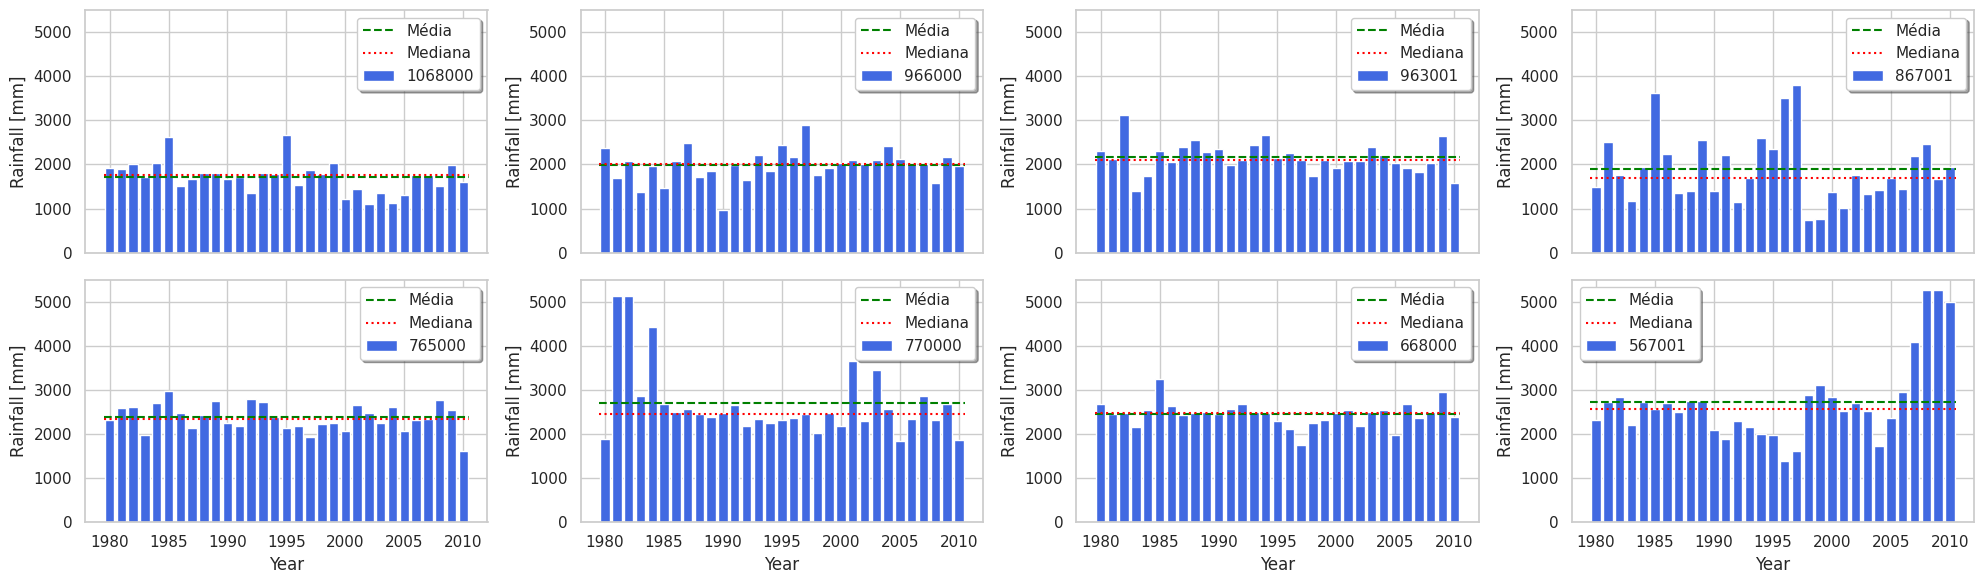

In [ ]:
sns.set(style="whitegrid")

fig1, ax = plt.subplots(2,4, figsize = (20,6), tight_layout=True, sharex = True)

for i, (ax, value, name) in enumerate(zip(ax.flatten(), df_prec_anual.values.T, df_prec_anual.columns)):
    #ax.set_xticks(df_prec_anual.index.year)
    #ax.set_xticklabels(labels = df_prec_anual.index.year.values, rotation=60)
    ax.bar(df_prec_anual.index.year, df_prec_anual[name], label=name, color = "royalblue")

    ax.hlines(df_prec_anual[name].mean(), 1979.5, 2010.5, color="green", label="Média", ls = "--")
    ax.hlines(df_prec_anual[name].median(), 1979.5, 2010.5, color="red", label="Mediana", ls = ":")
    if i >3:
        ax.set_xlabel ("Year")
    ax.set_ylabel("Rainfall [mm]")
    ax.set_ylim(0, 5500)
    ax.legend(shadow=True, loc="best")

plt.savefig('comparacao_8_pluv.png', dpi = 100, bbox_inches='tight')
plt.show();

In [ ]:
df_stats = df_prec_anual.describe().T
df_stats

,count,mean,std,min,25%,50%,75%,max
1068000,31.0,1721.229032,357.246975,1098.1,1511.25,1766.5,1888.45,2665.9
966000,31.0,1983.293548,366.251737,969.8,1807.50,2012.2,2146.25,2902.4
963001,31.0,2159.506452,341.334490,1397.9,2017.30,2103.9,2327.60,3122.8
867001,31.0,1885.570968,776.129002,731.3,1386.25,1689.2,2292.25,3796.9
765000,31.0,2377.883871,300.489152,1625.5,2178.85,2348.7,2611.90,2967.9
770000,31.0,2696.980645,832.487143,1843.7,2299.15,2455.4,2679.65,5128.5
668000,31.0,2454.312903,272.511487,1752.8,2338.55,2481.1,2553.40,3254.6
567001,31.0,2732.425806,957.831769,1387.2,2188.40,2571.6,2835.55,5271.0


## Comentários

Pela análise estatística e gráfico da série anual acima podemos dizer que:

1. O desvio padrão dos pluviômetros 567001, 770000 e 867001 está muito acima do resto. Os outros tem desvio próximo de 350, enquanto os 3 tem desvio acima de 750!
2. Os valores anuais (precipitação acumulada anual) do pluviômetro 567001 a partir de 2008 teve valores muito acima da média dele.
2. Os valores anuais (precipitação acumulada anual) do pluviômetro 770000 nos anos 1981, 1982 e 1994 tiveram valores muito acima da média dele.

# Pluviômetros escolhidos para a análise

Vamos converter o nosso mapa para coordenadas UTM e calcular as distâncias entre as estações.

## Alteração Projeção (Coord. Geo -> UTM)

Para alterar a projeção vamos precisar saber qual código EPSG temos na nossa zona UTM.


| DATUM | CóDIGO EPSG |
| :--- | :--- |
| WGS 1984 / UTM zone 18N | 32618 |
| WGS 1984 / UTM zone 18S | 32718 |
| WGS 1984 / UTM zone 19N | 32619 |
| WGS 1984 / UTM zone 19S | 32719 |
| WGS 1984 / UTM zone 20N | 32620 |
| WGS 1984 / UTM zone 20S | 32720 |
| WGS 1984 / UTM zone 21N | 32621 |
| WGS 1984 / UTM zone 21S | 32721 |
| WGS 1984 / UTM zone 22N | 32622 |
| WGS 1984 / UTM zone 22S | 32722 |
| WGS 1984 / UTM zone 23S | 32723 |
| WGS 1984 / UTM zone 24S | 32724 |
| WGS 1984 / UTM zone 25S | 32725 |

In [ ]:
# insert image in a text cell from link in dropbox
from IPython.display import Image
Image(url="https://www.dropbox.com/scl/fi/8nsn6fme813szdpcghqow/Fusos-e-hemisferios-da-projecao-UTM-para-o-Brasil.jpg?rlkey=d7nydohmna1lh5qlm5vebrujj&dl=1", width=400)

A bacia do Rio Purus está na região 19S $\rightarrow$ Código EPSG: 32719

In [ ]:
# escolhendo apenas algumas colunas do shapefile da exutória
exuto2 = exuto[['CODIGO', 'NOME','LATITUDE', 'LONGITUDE','geometry']]

# Convertendo de coordenadas geográficas (graus, min., seg.) para UTM (metros)
baciaUTM = bacia.to_crs("EPSG:32719")
hidroUTM = hidro.to_crs("EPSG:32719")
pluvio_selUTM = pluvio_sel.to_crs("EPSG:32719")
exutoUTM = exuto2.to_crs("EPSG:32719")

In [ ]:
pluvio_selUTM['lon'] = pluvio_selUTM.geometry.x
pluvio_selUTM['lat'] = pluvio_selUTM.geometry.y

exutoUTM['LONGITUDE'] = exutoUTM.geometry.x
exutoUTM['LATITUDE'] = exutoUTM.geometry.y

In [ ]:
exutoUTM

,CODIGO,NOME,LATITUDE,LONGITUDE,geometry
0,13880000,CANUTAMA,9.274878e+06,1.010669e+06,POINT (1010668.576 9274878.173)


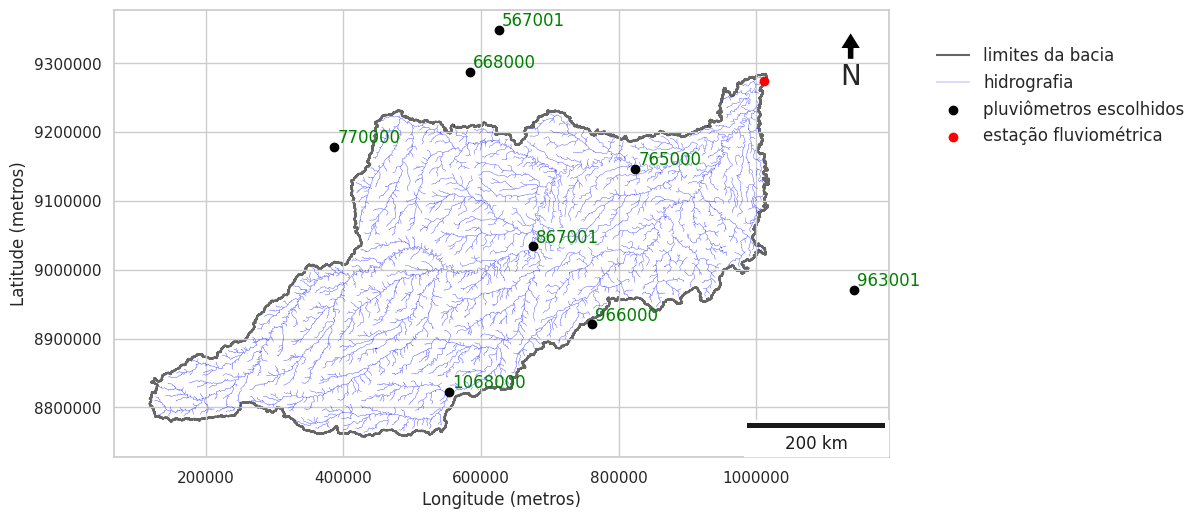

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

baciaUTM.geometry.boundary.plot(ax = ax, alpha = 0.6, color = None, edgecolor =  "black", label = 'limites da bacia',zorder=0)
hidroUTM.plot(ax=ax,color='blue', linewidth=0.2, label = 'hidrografia',zorder=1)
ax.scatter(pluvio_selUTM["lon"], pluvio_selUTM["lat"], color = "black", label = 'pluviômetros escolhidos',zorder=2)
for i, (x,y) in enumerate(zip (pluvio_selUTM["lon"], pluvio_selUTM["lat"])):
    label = pluvio_selUTM["name"][i]
    ax.annotate(label, (x,y), textcoords = "offset points", xytext = (2,3), color = "green")


# Create scale bar
scalebar = ScaleBar(1, location='lower right')
ax.add_artist(scalebar)
# Create north sign
x, y, arrow_length = 0.95, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

plt.xlabel('Longitude (metros)')
plt.ylabel('Latitude (metros)')

ax.scatter(exutoUTM['LONGITUDE'], exutoUTM['LATITUDE'], color = "red", label = 'estação fluviométrica',zorder=3)

plt.legend(loc="upper right",bbox_to_anchor=(1.4, 0.95), frameon=False, fontsize=12)

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# Show the plot
plt.savefig('pluviometros_escolhidos.png', dpi = 100, bbox_inches='tight')
#plt.savefig('Mutations_bars_correlation.pdf', dpi = 600, bbox_inches='tight')
plt.show();

### Função para encontrar a distância entre os pluviômetros

In [ ]:
# Converte de Geopandas para Dataframe (Pandas)
df_lista_pluv = pd.DataFrame(pluvio_selUTM)
#df_lista_pluv

In [ ]:
def encontra_dist_pluv_proximos(posto,df_lista_pluv):
  # Pluviômetro que estamos trabalhando = atual
  atual = df_lista_pluv.loc[df_lista_pluv['CODIGO'] == posto]

  # Pluviômetros que estão próximos ao atual = possiveis
  possiveis = df_lista_pluv.loc[df_lista_pluv['CODIGO'] != posto]
  possiveis = possiveis.reset_index()

  x = atual['lon'].values
  y = atual['lat'].values
  #print(x,y)

  lista_x = possiveis['lon'].values
  lista_y = possiveis['lat'].values
  #print(lista_x,lista_y)

  d = []
  for i in range(len(possiveis)):
    d.append(np.sqrt((x-lista_x[i])**2+(y-lista_y[i])**2))

  possiveis['distancia'] = np.array(d)
  proximos = possiveis.sort_values(by=['distancia'])
  proximos = proximos[['CODIGO','distancia']]
  return proximos

In [ ]:
# Distância dos pluviômetros próximos
posto = 867001
encontra_dist_pluv_proximos(posto,df_lista_pluv)

,CODIGO,distancia
1,966000,142281.409628
3,765000,186055.182092
0,1068000,243999.437315
5,668000,270180.324302
6,567001,318284.714706
4,770000,323074.447877
2,963001,470537.251843


## Quantidade de falhas

In [ ]:
# Número absoluto de dias com falha
df_pluv.isna().sum()

1068000    0
966000     0
963001     0
867001     0
765000     0
770000     0
668000     0
567001     0
dtype: int64

In [ ]:
# Fazer uma cópia do original
df_pluv_original = df_pluv.copy()

In [ ]:
df_pluv_original

,1068000,966000,963001,867001,765000,770000,668000,567001
data,,,,,,,,
1980-01-01,20.5,20.6,0.0,18.0,15.2,0.0,30.4,4.4
1980-01-02,0.0,0.0,0.0,0.0,16.4,0.0,0.0,22.6
1980-01-03,0.0,0.0,2.2,0.0,0.0,0.0,0.0,23.8
1980-01-04,0.0,1.0,6.4,14.0,0.0,10.3,0.0,0.0
1980-01-05,0.0,1.2,0.6,0.0,5.2,21.1,0.0,0.0
...,...,...,...,...,...,...,...,...
2010-12-27,0.0,0.0,0.0,3.1,1.6,0.0,11.3,56.3
2010-12-28,0.0,66.2,39.0,0.0,0.7,0.0,0.0,41.0
2010-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0


# Análise de consistência

## Curvas Dupla-massa ou Curvas Duplo-acumulativas

Uma vez corrigidas e preenchidas as séries, é necessário avaliar sua consistência em relação a região que está inserida, ou seja, verificar se o regime pluviométrico observado em um dado posto apresenta homogeneidade em relação a seus vizinhos. O método da curva Dupla Massa, ou duplo-acumulativa, criado pelo Geological Survey (USA), pode ser usado para ajustar dados de precipitação inconsistentes.

A técnica consiste em acumular os totais anuais, ou mensais, de precipitação do posto em análise e dos postos de apoio, e gerar um gráfico cartesiano com estes valores, sendo o posto a consistir nas ordenadas e a média dos apoios na abscissa. Se as séries são homogêneas, os pontos da curva devem alinhar-se segundo uma única reta. Caso apresentem tendências diferentes, pode-se detectar problemas nos dados tais como erros sistemáticos, mudança nas condições de observação, alterações climáticas, erros de transcrição, eventos extremos e regimes pluviométricos diferentes.

### Explicação da Curva de dupla-massa

A teoria da curva de massa dupla baseia-se no fato de que um gráfico da acumulação de uma quantidade em relação à acumulação de outra quantidade durante o mesmo período será traçado como uma linha reta, desde que os dados sejam proporcionais; a inclinação da linha representará a constante de proporcionalidade entre as quantidades.


In [ ]:
df_pluv['mean'] = df_pluv_original.mean(axis=1)
df_pluv['sum'] = df_pluv_original.sum(axis=1)

In [ ]:
df_pluv

,1068000,966000,963001,867001,765000,770000,668000,567001,mean,sum
data,,,,,,,,,,
1980-01-01,20.5,20.6,0.0,18.0,15.2,0.0,30.4,4.4,13.6375,109.1
1980-01-02,0.0,0.0,0.0,0.0,16.4,0.0,0.0,22.6,4.8750,39.0
1980-01-03,0.0,0.0,2.2,0.0,0.0,0.0,0.0,23.8,3.2500,26.0
1980-01-04,0.0,1.0,6.4,14.0,0.0,10.3,0.0,0.0,3.9625,31.7
1980-01-05,0.0,1.2,0.6,0.0,5.2,21.1,0.0,0.0,3.5125,28.1
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0.0,0.0,0.0,3.1,1.6,0.0,11.3,56.3,9.0375,72.3
2010-12-28,0.0,66.2,39.0,0.0,0.7,0.0,0.0,41.0,18.3625,146.9
2010-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,4.1250,33.0


In [ ]:
# Fazer o acumulado mensal
df_pluv_anual = df_pluv.resample('Y').sum()
acumulado = df_pluv_anual.cumsum()
acumulado

,1068000,966000,963001,867001,765000,770000,668000,567001,mean,sum
data,,,,,,,,,,
1980-12-31,1911.1,2373.5,2314.7,1478.5,2320.6,1895.1,2683.6,2327.7,2163.1000,17304.8
1981-12-31,3803.8,4063.5,4444.8,3975.1,4921.4,7023.6,5141.4,5059.0,4804.0750,38432.6
1982-12-31,5804.5,6135.8,7567.6,5737.3,7536.8,12147.0,7613.5,7899.4,7555.2375,60441.9
1983-12-31,7512.1,7506.4,8965.5,6898.1,9518.8,15007.1,9762.9,10109.7,9410.0750,75280.6
1984-12-31,9537.3,9480.5,10699.0,8830.2,12226.9,19429.0,12304.0,12829.4,11917.0375,95336.3
1985-12-31,12157.0,10956.8,13014.0,12453.2,15194.8,22105.3,15558.6,15401.0,14605.0875,116840.7
1986-12-31,13672.0,13036.5,15067.2,14698.0,17661.7,24595.1,18193.8,18105.6,16878.7375,135029.9
1987-12-31,15335.4,15514.7,17471.3,16044.5,19790.0,27151.6,20624.4,20593.9,19065.7250,152525.8
1988-12-31,17136.6,17228.4,20030.6,17445.4,22230.3,29607.0,23104.1,23345.8,21266.0250,170128.2


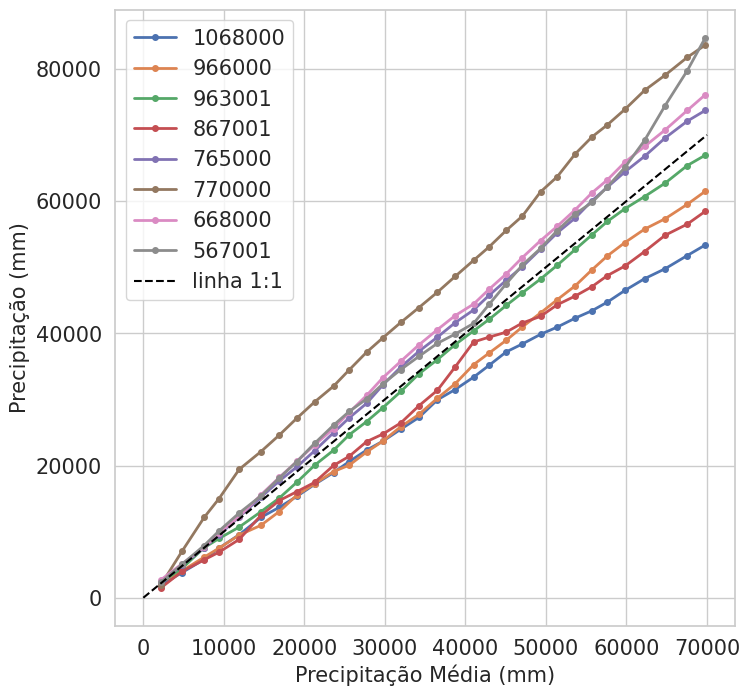

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(acumulado['mean'],acumulado['1068000'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='1068000')
plt.plot(acumulado['mean'],acumulado['966000'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='966000')
plt.plot(acumulado['mean'],acumulado['963001'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='963001')
plt.plot(acumulado['mean'],acumulado['867001'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='867001')
plt.plot(acumulado['mean'],acumulado['765000'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='765000')
plt.plot(acumulado['mean'],acumulado['770000'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='770000')
plt.plot(acumulado['mean'],acumulado['668000'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='668000')
plt.plot(acumulado['mean'],acumulado['567001'],'-o',markersize = 4, markeredgewidth = 1, linewidth = 2, label='567001')

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

## Análise

Conforme já vimos antes, as estações 770000 e 567001 tiveram quebras importantes, que podem ser visualizadas na mudança abrupta da inclinação das curvas acima.

A estação 867001 (vermelha) teve um comportamento bem estranho, uma quebra abrupta na metade da série temporal.


### O que fazer?


## Exclusão de estação

A **estação 567001 agora pode ser excluída da média** e da análise pois está acima da 668000 (ver mapa) e não vai influenciar nas médias (thiessen).

In [ ]:
df_pluv_novo = df_pluv_original.copy()
selecao = df_pluv_original.drop(['567001'], axis=1)
#selecao
selecao['mean'] = selecao.mean(axis=1)
selecao['sum'] = selecao.sum(axis=1)
df_pluv_novo['mean'] = selecao['mean']
df_pluv_novo['sum'] = selecao['sum']

df_pluv_novo

,1068000,966000,963001,867001,765000,770000,668000,567001,mean,sum
data,,,,,,,,,,
1980-01-01,20.5,20.6,0.0,18.0,15.2,0.0,30.4,4.4,14.957143,119.657143
1980-01-02,0.0,0.0,0.0,0.0,16.4,0.0,0.0,22.6,2.342857,18.742857
1980-01-03,0.0,0.0,2.2,0.0,0.0,0.0,0.0,23.8,0.314286,2.514286
1980-01-04,0.0,1.0,6.4,14.0,0.0,10.3,0.0,0.0,4.528571,36.228571
1980-01-05,0.0,1.2,0.6,0.0,5.2,21.1,0.0,0.0,4.014286,32.114286
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0.0,0.0,0.0,3.1,1.6,0.0,11.3,56.3,2.285714,18.285714
2010-12-28,0.0,66.2,39.0,0.0,0.7,0.0,0.0,41.0,15.128571,121.028571
2010-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.000000,0.000000


In [ ]:
# Fazer o acumulado mensal
df_pluv_anual = df_pluv_novo.resample('Y').sum()
acumulado = df_pluv_anual.cumsum()
#acumulado

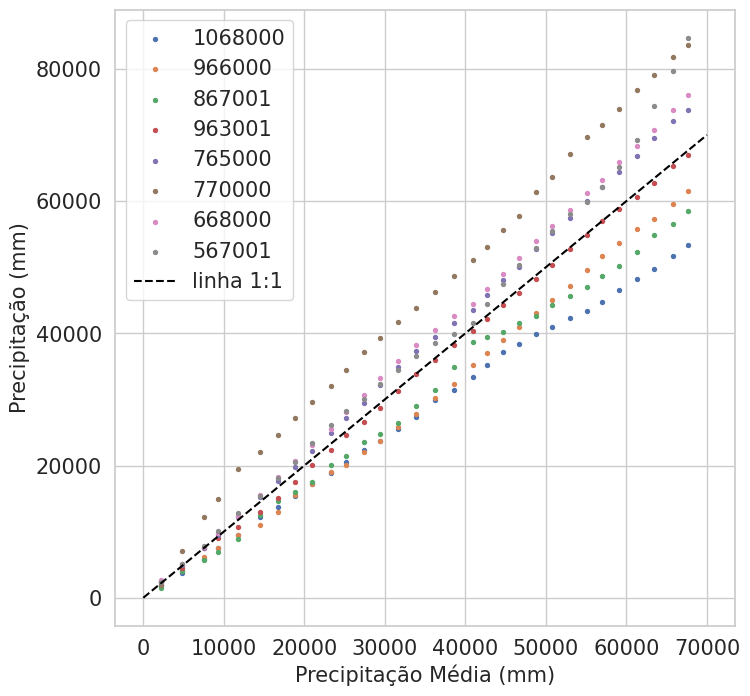

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(acumulado['mean'],acumulado['1068000'],s = 8, label='1068000')
plt.scatter(acumulado['mean'],acumulado['966000'],s = 8, label='966000')
plt.scatter(acumulado['mean'],acumulado['867001'],s = 8, label='867001')
plt.scatter(acumulado['mean'],acumulado['963001'],s = 8, label='963001')
plt.scatter(acumulado['mean'],acumulado['765000'],s = 8, label='765000')
plt.scatter(acumulado['mean'],acumulado['770000'],s = 8, label='770000')
plt.scatter(acumulado['mean'],acumulado['668000'],s = 8, label='668000')
plt.scatter(acumulado['mean'],acumulado['567001'],s = 8, label='567001')

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

# Consistência da 770000

Análise e realização da consistência para a estação pluviométrica 770000

In [ ]:
anos = list(acumulado.index.year)
print(anos)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


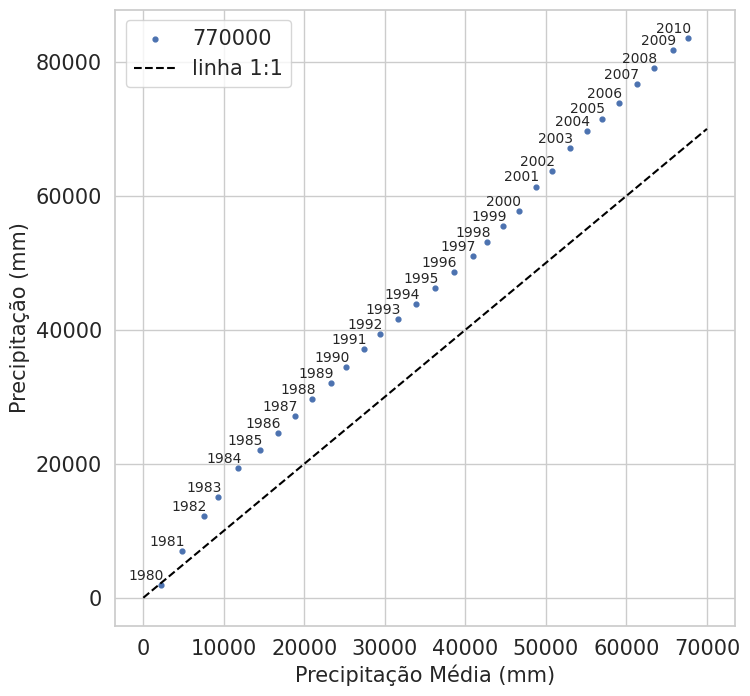

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#plt.scatter(acumulado['mean'],acumulado['1068000'],s = 8, label='1068000')
#plt.scatter(acumulado['mean'],acumulado['966000'],s = 8, label='966000')
#plt.scatter(acumulado['mean'],acumulado['867001'],s = 8, label='867001')
#plt.scatter(acumulado['mean'],acumulado['963001'],s = 8, label='963001')
#plt.scatter(acumulado['mean'],acumulado['765000'],s = 8, label='765000')
plt.scatter(acumulado['mean'],acumulado['770000'],s = 12, label='770000')
#plt.scatter(acumulado['mean'],acumulado['668000'],s = 8, label='668000')

x = acumulado['mean'].values
y = acumulado['770000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

## Reta de 1980 a 1984

Ao usar a curva de massa dupla, assumimos que a relação entre as quantidades $X$ e $Y$ pode ser expressa por uma reta que tem uma equação da forma $Y=bX$, onde $b$ é a inclinação da curva de massa dupla. Esta suposição é substancialmente correta para relações que envolvem apenas dados de precipitação, mas não é verdadeira para muitas das relações que envolvem dados de vazão ou para relações entre precipitação e vazão.

$$
Y = bX
$$

In [ ]:
acumulado['770000']['1980':'1984']

data
1980-12-31     1895.1
1981-12-31     7023.6
1982-12-31    12147.0
1983-12-31    15007.1
1984-12-31    19429.0
Freq: A-DEC, Name: 770000, dtype: float64

In [ ]:
################## Reta 1
X1 = acumulado['mean']['1980':'1984'].values
Y1 = acumulado['770000']['1980':'1984'].values

model = sm.OLS(Y1,X1)
results = model.fit()
b1_770000 = results.params[0]
print(b1_770000)

slope = b1_770000
def linefitline(x):
    return slope * x
line1 = linefitline(X1)

################## Reta 2
#X2 = acumulado['mean']['1984':'2000'].values
#Y2 = acumulado['770000']['1984':'2000'].values

X2 = acumulado['mean']['1984':'2010'].values
Y2 = acumulado['770000']['1984':'2010'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y2)
def linefitline(b):
    return intercept + slope * b
line2 = linefitline(X2)
b2_770000 = slope
print(b2_770000)
#print(slope, intercept)

1.608511024141106
1.159870645369053


## Correção de 1980 a 1984

\begin{aligned}
& \qquad P_a=\frac{b_a}{b_o} P_o \\
& \text { sendo: } \\
& P_a=\text { precipitação ajustada } \\
& P_o=\text { precipitação observada } \\
& b_a=\text { inclinação da reta para a qual os registros são ajustados } \\
& b_o=\text { inclinação da reta dos dados } P_o \text { observados }
\end{aligned}

Vamos considerar $b_a = 1$

In [ ]:
df_pluv_anual['770000_corr'] = df_pluv_anual['770000']
df_pluv_anual['770000_corr']['1980':'1984'] = df_pluv_anual['770000']['1980':'1984']/b1_770000
df_pluv_anual['770000_corr']['1984':'2010'] = df_pluv_anual['770000']['1984':'2010']/b2_770000

acumulado2 = df_pluv_anual.cumsum()

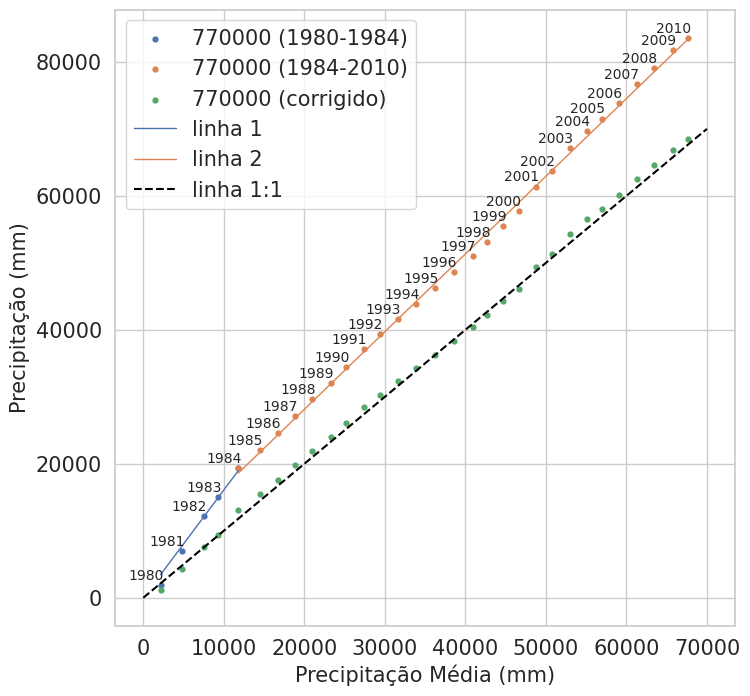

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#plt.scatter(acumulado['mean'],acumulado['1068000'],s = 8, label='1068000')
#plt.scatter(acumulado['mean'],acumulado['966000'],s = 8, label='966000')
#plt.scatter(acumulado['mean'],acumulado['867001'],s = 8, label='867001')
#plt.scatter(acumulado['mean'],acumulado['963001'],s = 8, label='963001')
#plt.scatter(acumulado['mean'],acumulado['765000'],s = 8, label='765000')
plt.scatter(acumulado['mean']['1980':'1984'],acumulado['770000']['1980':'1984'],s = 12, label='770000 (1980-1984)')
plt.scatter(acumulado['mean']['1984':'2010'],acumulado['770000']['1984':'2010'],s = 12, label='770000 (1984-2010)')
plt.scatter(acumulado2['mean'],acumulado2['770000_corr'],s = 12, label='770000 (corrigido)')
#plt.scatter(acumulado['mean'],acumulado['668000'],s = 8, label='668000')

plt.plot(X1,line1,'-',markersize = 0, linewidth = 1, label='linha 1')
plt.plot(X2,line2,'-',markersize = 0, linewidth = 1, label='linha 2')

x = acumulado['mean'].values
y = acumulado['770000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

# Consistência da 1068000

Análise e realização da consistência para a estação pluviométrica 1068000

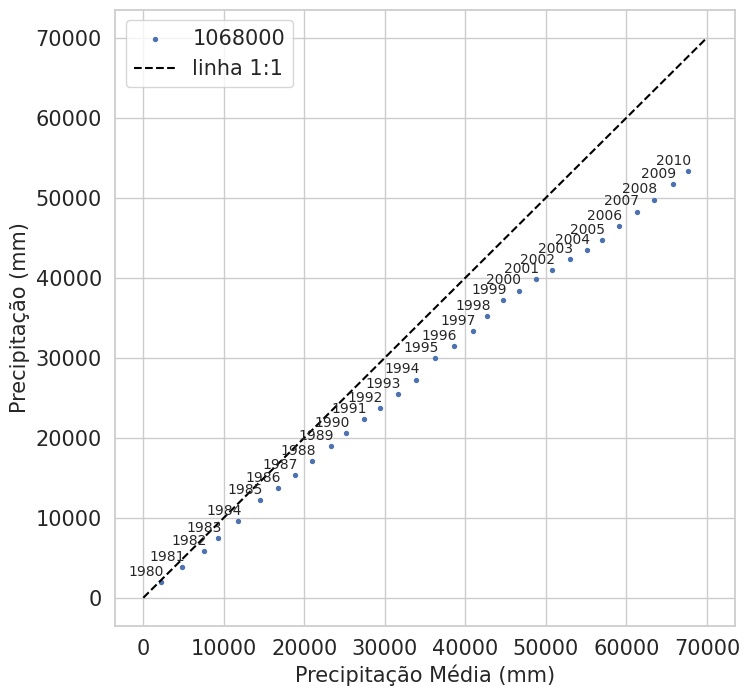

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean'],acumulado['1068000'],s = 8, label='1068000')
#plt.scatter(acumulado['mean'],acumulado['966000'],s = 8, label='966000')
#plt.scatter(acumulado['mean'],acumulado['867001'],s = 8, label='867001')
#plt.scatter(acumulado['mean'],acumulado['963001'],s = 8, label='963001')
#plt.scatter(acumulado['mean'],acumulado['765000'],s = 8, label='765000')
#plt.scatter(acumulado['mean'],acumulado['770000'],s = 12, label='770000')
#plt.scatter(acumulado['mean'],acumulado['668000'],s = 8, label='668000')

x = acumulado['mean'].values
y = acumulado['1068000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

Por uma inspeção visual, me parece que há duas inclinações. Vou fazer duas correções:

* 1980-1998
* 1998-2010

In [ ]:
################## Reta 1
X1 = acumulado['mean']['1980':'1998'].values
Y1 = acumulado['1068000']['1980':'1998'].values

model = sm.OLS(Y1,X1)
results = model.fit()
b1_1068000 = results.params[0]
print(b1_1068000)

slope = b1_1068000
def linefitline(x):
    return slope * x
line1 = linefitline(X1)

################## Reta 2
X2 = acumulado['mean']['1998':'2010'].values
Y2 = acumulado['1068000']['1998':'2010'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y2)
def linefitline(b):
    return intercept + slope * b
line2 = linefitline(X2)
b2_1068000 = slope
print(b2_1068000)
#print(slope, intercept)

0.8154098133642984
0.7011871223968209


In [ ]:
df_pluv_anual['1068000_corr'] = df_pluv_anual['1068000']
df_pluv_anual['1068000_corr']['1980':'1998'] = df_pluv_anual['1068000']['1980':'1998']/b1_1068000
df_pluv_anual['1068000_corr']['1998':'2010'] = df_pluv_anual['1068000']['1998':'2010']/b2_1068000

acumulado2 = df_pluv_anual.cumsum()

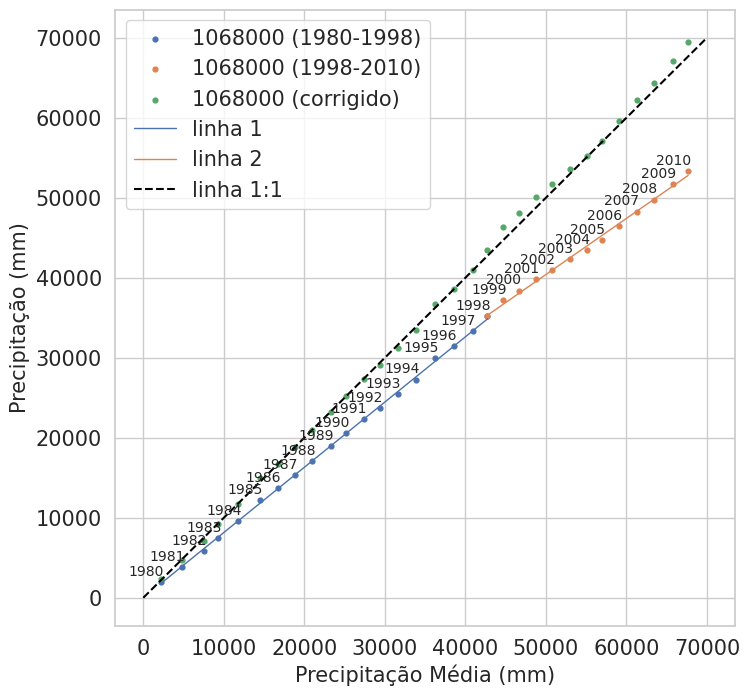

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean']['1980':'1998'],acumulado['1068000']['1980':'1998'],s = 12, label='1068000 (1980-1998)')
plt.scatter(acumulado['mean']['1998':'2010'],acumulado['1068000']['1998':'2010'],s = 12, label='1068000 (1998-2010)')
plt.scatter(acumulado2['mean'],acumulado2['1068000_corr'],s = 12, label='1068000 (corrigido)')

plt.plot(X1,line1,'-',markersize = 0, linewidth = 1, label='linha 1')
plt.plot(X2,line2,'-',markersize = 0, linewidth = 1, label='linha 2')

x = acumulado['mean'].values
y = acumulado['1068000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

# Consistência da 966000

Análise e realização da consistência para a estação pluviométrica 966000

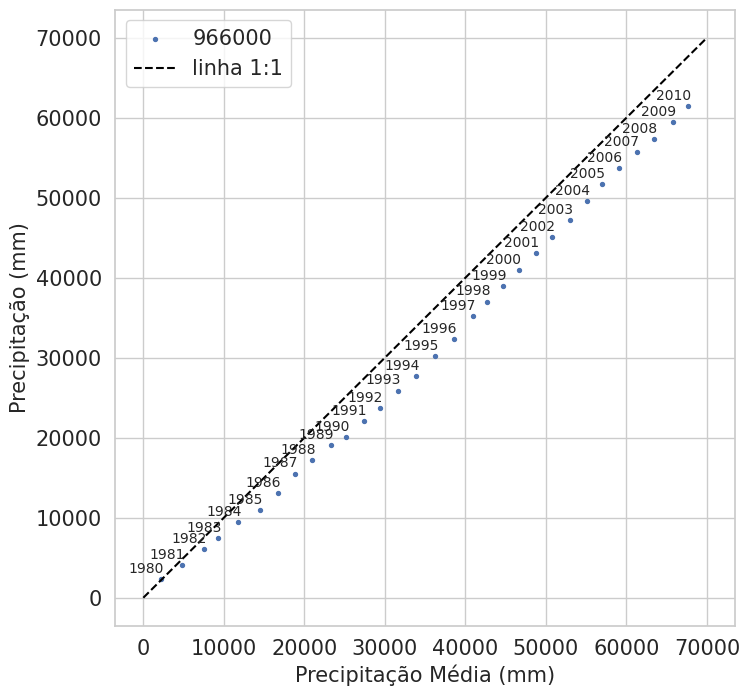

In [ ]:
estacao = '966000'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean'],acumulado[estacao],s = 8, label=estacao)

x = acumulado['mean'].values
y = acumulado[estacao].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

Por uma inspeção visual, me parece que há duas inclinações. Vou fazer duas correções:

* 1980-1990
* 1990-2010

In [ ]:
estacao

'966000'

In [ ]:
################## Reta 1
X1 = acumulado['mean']['1980':'1990'].values
Y1 = acumulado[estacao]['1980':'1990'].values

model = sm.OLS(Y1,X1)
results = model.fit()
b1_966000 = results.params[0]
print(b1_966000)

slope = b1_966000
def linefitline(x):
    return slope * x
line1 = linefitline(X1)

################## Reta 2
X2 = acumulado['mean']['1990':'2010'].values
Y2 = acumulado[estacao]['1990':'2010'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y2)
def linefitline(b):
    return intercept + slope * b
line2 = linefitline(X2)
b2_966000 = slope
print(b2_966000)
#print(slope, intercept)

0.8057329547086508
0.9941014328998725


In [ ]:
df_pluv_anual['966000_corr'] = df_pluv_anual['966000']
df_pluv_anual['966000_corr']['1980':'1990'] = df_pluv_anual['966000']['1980':'1990']/b1_966000
df_pluv_anual['966000_corr']['1990':'2010'] = df_pluv_anual['966000']['1990':'2010']/b2_966000

acumulado2 = df_pluv_anual.cumsum()

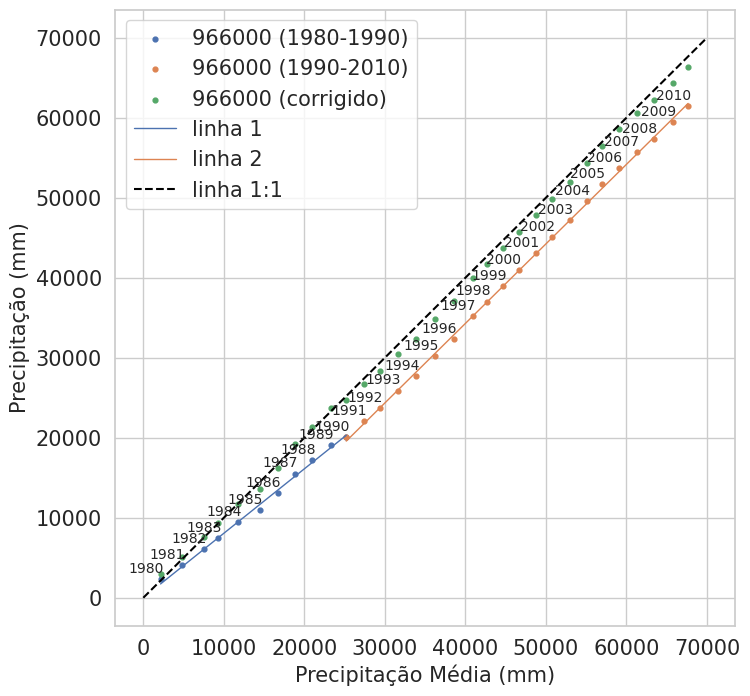

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean']['1980':'1990'],acumulado['966000']['1980':'1990'],s = 12, label='966000 (1980-1990)')
plt.scatter(acumulado['mean']['1990':'2010'],acumulado['966000']['1990':'2010'],s = 12, label='966000 (1990-2010)')
plt.scatter(acumulado2['mean'],acumulado2['966000_corr'],s = 12, label='966000 (corrigido)')

plt.plot(X1,line1,'-',markersize = 0, linewidth = 1, label='linha 1')
plt.plot(X2,line2,'-',markersize = 0, linewidth = 1, label='linha 2')

x = acumulado['mean'].values
y = acumulado['966000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

# Consistência da 867001

Análise e realização da consistência para a estação pluviométrica 867001

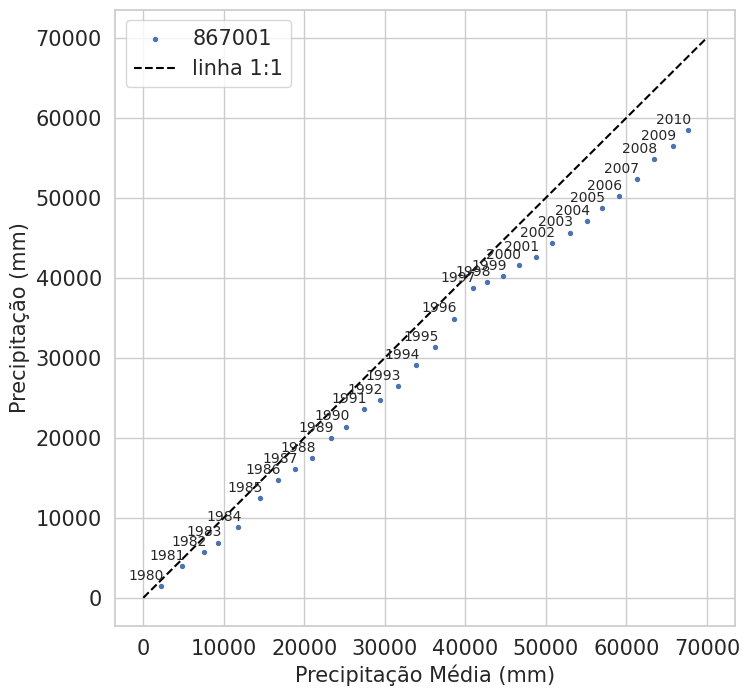

In [ ]:
estacao = '867001'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean'],acumulado[estacao],s = 8, label=estacao)

x = acumulado['mean'].values
y = acumulado[estacao].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

Por uma inspeção visual, me parece que há duas inclinações. Vou fazer duas correções:

* 1980-1995
* 1995-1997
* 1997-2010

In [ ]:
estacao

'867001'

In [ ]:
################## Reta 1
X1 = acumulado['mean']['1980':'1995'].values
Y1 = acumulado[estacao]['1980':'1995'].values

model = sm.OLS(Y1,X1)
results = model.fit()
b1_867001 = results.params[0]
print(b1_867001)

slope = b1_867001
def linefitline(x):
    return slope * x
line1 = linefitline(X1)

################## Reta 2
X2 = acumulado['mean']['1995':'1997'].values
Y2 = acumulado[estacao]['1995':'1997'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y2)
def linefitline(b):
    return intercept + slope * b
line2 = linefitline(X2)
b2_867001 = slope
print(b2_867001)

################## Reta 3
X3 = acumulado['mean']['1997':'2010'].values
Y3 = acumulado[estacao]['1997':'2010'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X3,Y3)
def linefitline(b):
    return intercept + slope * b
line3 = linefitline(X3)
b3_867001 = slope
print(b3_867001)
#print(slope, intercept)

0.8494283723276388
1.5516238024005768
0.7485369374065317


In [ ]:
df_pluv_anual['867001_corr'] = df_pluv_anual['867001']
df_pluv_anual['867001_corr']['1980':'1995'] = df_pluv_anual['867001']['1980':'1995']/b1_867001
df_pluv_anual['867001_corr']['1995':'1997'] = df_pluv_anual['867001']['1995':'1997']/b2_867001
df_pluv_anual['867001_corr']['1997':'2010'] = df_pluv_anual['867001']['1997':'2010']/b3_867001

acumulado2 = df_pluv_anual.cumsum()

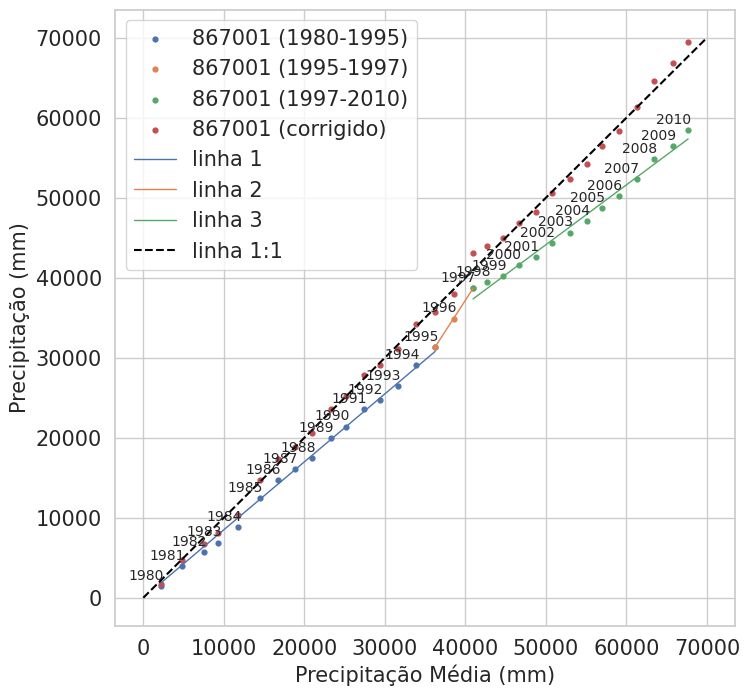

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean']['1980':'1995'],acumulado['867001']['1980':'1995'],s = 12, label='867001 (1980-1995)')
plt.scatter(acumulado['mean']['1995':'1997'],acumulado['867001']['1995':'1997'],s = 12, label='867001 (1995-1997)')
plt.scatter(acumulado['mean']['1997':'2010'],acumulado['867001']['1997':'2010'],s = 12, label='867001 (1997-2010)')
plt.scatter(acumulado2['mean'],acumulado2['867001_corr'],s = 12, label='867001 (corrigido)')

plt.plot(X1,line1,'-',markersize = 0, linewidth = 1, label='linha 1')
plt.plot(X2,line2,'-',markersize = 0, linewidth = 1, label='linha 2')
plt.plot(X3,line3,'-',markersize = 0, linewidth = 1, label='linha 3')

x = acumulado['mean'].values
y = acumulado['867001'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

# Consistência da 963001

Análise e realização da consistência para a estação pluviométrica 963001

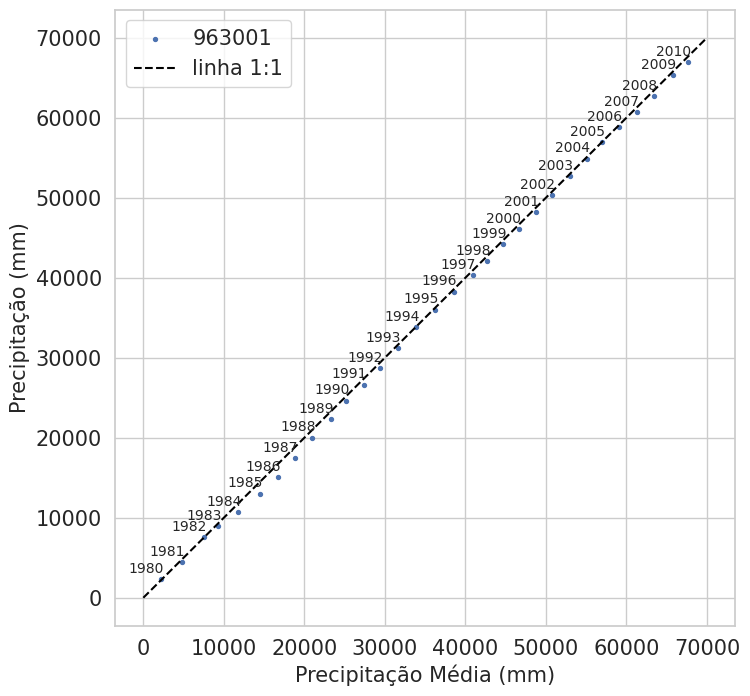

In [ ]:
estacao = '963001'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean'],acumulado[estacao],s = 8, label=estacao)

x = acumulado['mean'].values
y = acumulado[estacao].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

Por uma inspeção visual, me parece que há uma inclinação. Não vou fazer duas correções.

# Consistência da 765000

Análise e realização da consistência para a estação pluviométrica 765000

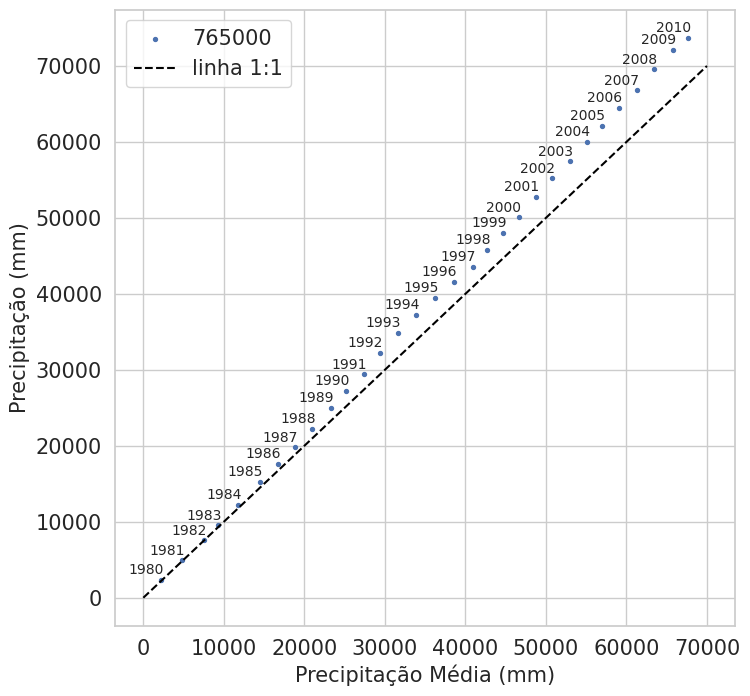

In [ ]:
estacao = '765000'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean'],acumulado[estacao],s = 8, label=estacao)

x = acumulado['mean'].values
y = acumulado[estacao].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

Por uma inspeção visual, me parece que há duas inclinações. Vou fazer duas correções:

* 1980-1985
* 1985-2010

In [ ]:
estacao

'765000'

In [ ]:
################## Reta 1
X1 = acumulado['mean']['1980':'1985'].values
Y1 = acumulado[estacao]['1980':'1985'].values

model = sm.OLS(Y1,X1)
results = model.fit()
b1_765000 = results.params[0]
print(b1_765000)

slope = b1_765000
def linefitline(x):
    return slope * x
line1 = linefitline(X1)

################## Reta 2
X2 = acumulado['mean']['1985':'2010'].values
Y2 = acumulado[estacao]['1985':'2010'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y2)
def linefitline(b):
    return intercept + slope * b
line2 = linefitline(X2)
b2_765000 = slope
print(b2_765000)
#print(slope, intercept)

1.0359662729868044
1.1005337050161803


In [ ]:
df_pluv_anual['765000_corr'] = df_pluv_anual['765000']
df_pluv_anual['765000_corr']['1980':'1985'] = df_pluv_anual['765000']['1980':'1985']/b1_765000
df_pluv_anual['765000_corr']['1985':'2010'] = df_pluv_anual['765000']['1985':'2010']/b2_765000

acumulado2 = df_pluv_anual.cumsum()

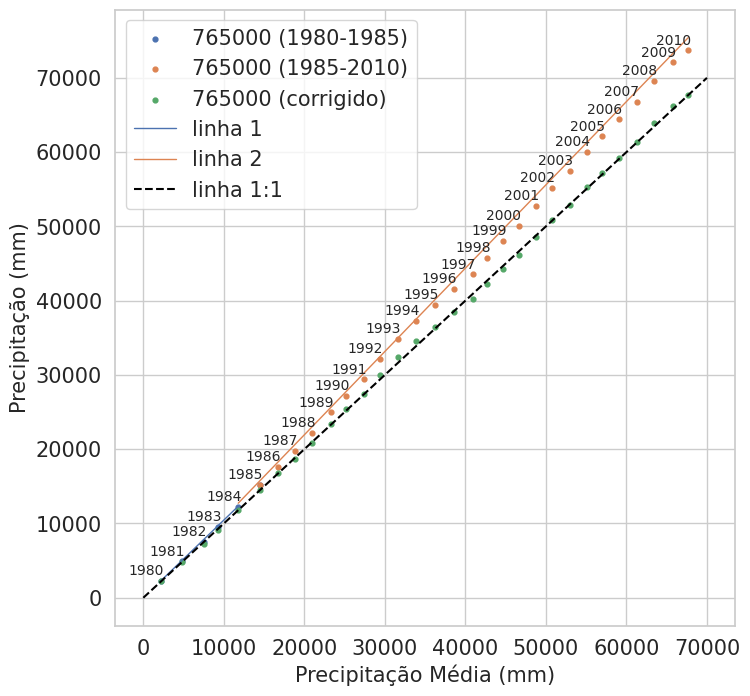

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean']['1980':'1985'],acumulado['765000']['1980':'1985'],s = 12, label='765000 (1980-1985)')
plt.scatter(acumulado['mean']['1985':'2010'],acumulado['765000']['1985':'2010'],s = 12, label='765000 (1985-2010)')
plt.scatter(acumulado2['mean'],acumulado2['765000_corr'],s = 12, label='765000 (corrigido)')

plt.plot(X1,line1,'-',markersize = 0, linewidth = 1, label='linha 1')
plt.plot(X2,line2,'-',markersize = 0, linewidth = 1, label='linha 2')

x = acumulado['mean'].values
y = acumulado['765000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

plt.savefig('prec_duplo_acumulado_765000.png', dpi = 300)
plt.show()

# Consistência da 668000

Análise e realização da consistência para a estação pluviométrica 668000

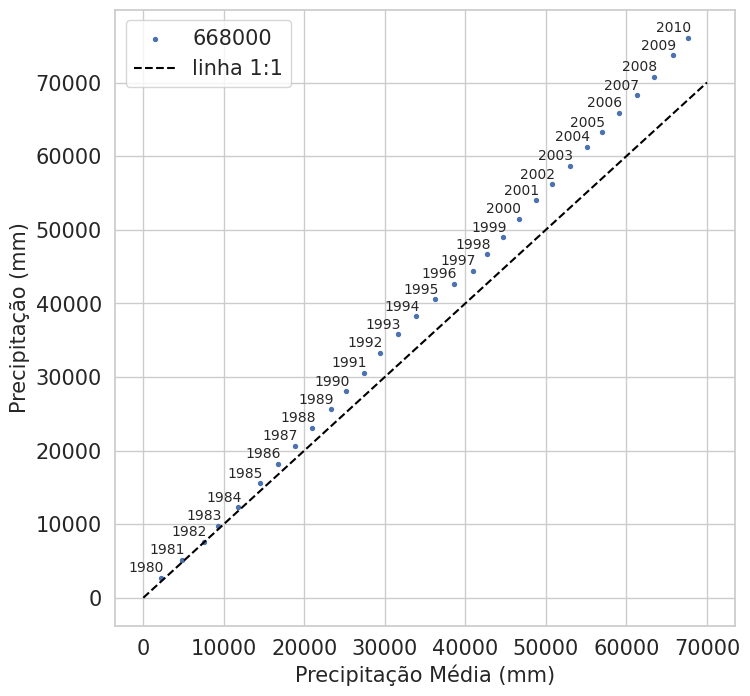

In [ ]:
estacao = '668000'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean'],acumulado[estacao],s = 8, label=estacao)

x = acumulado['mean'].values
y = acumulado[estacao].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

Por uma inspeção visual, me parece que há duas inclinações. Vou fazer duas correções:

* 1980-1984
* 1984-2010

In [ ]:
estacao

'668000'

In [ ]:
################## Reta 1
X1 = acumulado['mean']['1980':'1984'].values
Y1 = acumulado[estacao]['1980':'1984'].values

model = sm.OLS(Y1,X1)
results = model.fit()
b1_668000 = results.params[0]
print(b1_668000)

slope = b1_668000
def linefitline(x):
    return slope * x
line1 = linefitline(X1)

################## Reta 2
X2 = acumulado['mean']['1984':'2010'].values
Y2 = acumulado[estacao]['1984':'2010'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y2)
def linefitline(b):
    return intercept + slope * b
line2 = linefitline(X2)
b2_668000 = slope
print(b2_668000)
#print(slope, intercept)

1.0454798220144033
1.1215765836085005


In [ ]:
df_pluv_anual['668000_corr'] = df_pluv_anual['668000']
df_pluv_anual['668000_corr']['1980':'1984'] = df_pluv_anual['668000']['1980':'1984']/b1_668000
df_pluv_anual['668000_corr']['1984':'2010'] = df_pluv_anual['668000']['1984':'2010']/b2_668000

acumulado2 = df_pluv_anual.cumsum()

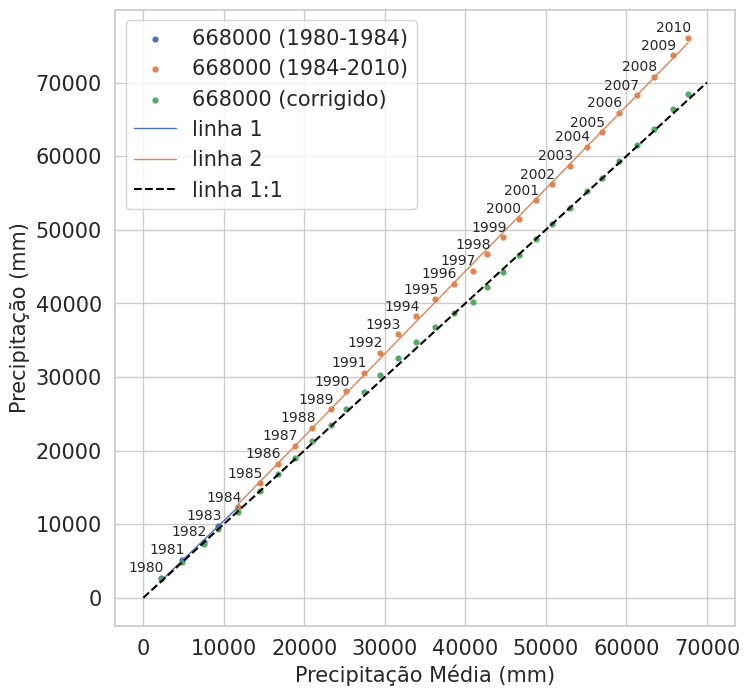

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(acumulado['mean']['1980':'1984'],acumulado['668000']['1980':'1984'],s = 12, label='668000 (1980-1984)')
plt.scatter(acumulado['mean']['1984':'2010'],acumulado['668000']['1984':'2010'],s = 12, label='668000 (1984-2010)')
plt.scatter(acumulado2['mean'],acumulado2['668000_corr'],s = 12, label='668000 (corrigido)')

plt.plot(X1,line1,'-',markersize = 0, linewidth = 1, label='linha 1')
plt.plot(X2,line2,'-',markersize = 0, linewidth = 1, label='linha 2')

x = acumulado['mean'].values
y = acumulado['668000'].values

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')


for i, txt in enumerate(anos):
  ax.text(x[i]-4000, y[i]+800, txt, size=10)

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

#plt.savefig('prec_duplo_acumulado_todas.png', dpi = 300)
plt.show()

# Finalização da Consistência via curva dupla-massa

In [ ]:
df_pluv_anual = df_pluv_anual.drop(['567001'],axis=1)
df_pluv_anual[0:2]

,1068000,966000,963001,867001,765000,770000,668000,mean,sum,770000_corr,1068000_corr,966000_corr,867001_corr,765000_corr,668000_corr
data,,,,,,,,,,,,,,,
1980-12-31,1911.1,2373.5,2314.7,1478.5,2320.6,1895.1,2683.6,2139.585714,17116.685714,1178.170352,2343.729458,2945.765078,1740.582312,2240.034314,2566.859679
1981-12-31,1892.7,1690.0,2130.1,2496.6,2600.8,5128.5,2457.8,2628.071429,21024.571429,3188.352410,2321.164118,2097.469131,2939.153060,2510.506440,2350.882292


In [ ]:
#print(b1_770000, b2_770000)
#print(b1_1068000, b2_1068000)
#print(b1_966000, b2_966000)
#print(b1_867001, b2_867001, b3_867001)
print(b1_765000, b2_765000)
#print(b1_668000, b2_668000)

1.0359662729868044 1.1005337050161803


# Tabela das correções

| Estação  |  Período 1 | Período 2  | Período 3  | b1  | b2 | b3|
|---|:---:|:---:|:---:|:---:|:---:|:---:|
| 770000  | 1980-1984 | 1984-2010 |  -  | 1.6085  | 1.1598  | -  |
| 1068000  | 1980-1998  | 1998-2010  |  - | 0.8154  | 0.7011  | -  |
| 966000  | 1980-1990  | 1990-2010  |  - | 0.8057  | 0.9941  | -  |
| 963001  |  - |  - |  - |  - |  - |  - |
| 867001  | 1980-1995  | 1995-1997  | 1997-2010  | 0.8494  | 1.5516  | 0.7485  |
| 765000  | 1980-1985 | 1985-2010| -  | 1.03596  | 1.1005  | -  |
| 668000  | 1980-1984  | 1984-2010  | -  |  1.0454 | 1.1215  |  - |




In [ ]:
df_pluv_anual

,1068000,966000,963001,867001,765000,770000,668000,mean,sum,770000_corr,1068000_corr,966000_corr,867001_corr,765000_corr,668000_corr
data,,,,,,,,,,,,,,,
1980-12-31,1911.1,2373.5,2314.7,1478.5,2320.6,1895.1,2683.6,2139.585714,17116.685714,1178.170352,2343.729458,2945.765078,1740.582312,2240.034314,2566.859679
1981-12-31,1892.7,1690.0,2130.1,2496.6,2600.8,5128.5,2457.8,2628.071429,21024.571429,3188.352410,2321.164118,2097.469131,2939.153060,2510.506440,2350.882292
1982-12-31,2000.7,2072.3,3122.8,1762.2,2615.4,5123.4,2472.1,2738.414286,21907.314286,3185.181776,2453.612855,2571.943952,2074.571627,2524.599563,2364.560222
1983-12-31,1707.6,1370.6,1397.9,1160.8,1982.0,2860.1,2149.4,1804.057143,14432.457143,1778.104071,2094.161699,1701.059876,1366.566079,1913.189697,2055.898119
1984-12-31,2025.2,1974.1,1733.5,1932.1,2708.1,4421.9,2541.1,2476.571429,19812.571429,3812.407890,2483.659096,2450.067344,2274.588491,2614.081240,2265.650012
1985-12-31,2619.7,1476.3,2315.0,3623.0,2967.9,2676.3,3254.6,2704.685714,21637.485714,2307.412478,3212.740339,1832.244780,4265.221316,2696.782467,2901.808087
1986-12-31,1515.0,2079.7,2053.2,2244.8,2466.9,2489.8,2635.2,2212.085714,17696.685714,2146.618685,1857.961451,2581.128137,2642.718413,2241.548795,2349.549766
1987-12-31,1663.4,2478.2,2404.1,1346.5,2128.3,2556.5,2430.6,2143.942857,17151.542857,2204.125098,2039.955827,3075.708875,1585.183688,1933.879890,2167.127984
1988-12-31,1801.2,1713.7,2559.3,1400.9,2440.3,2455.4,2479.7,2121.500000,16972.000000,2116.960206,2208.950604,2126.883343,1649.226757,2217.378704,2210.905645


In [ ]:
acumulado3 = df_pluv_anual.cumsum()

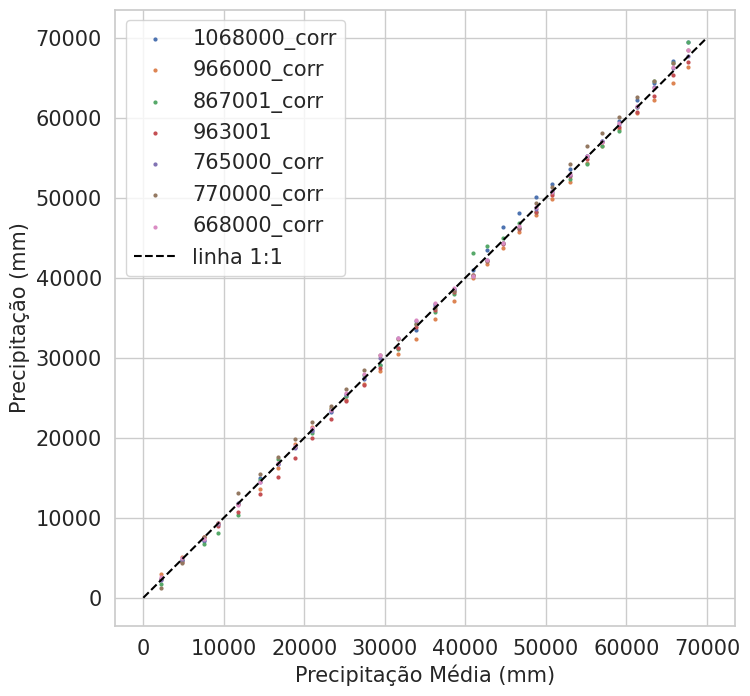

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(acumulado3['mean'],acumulado3['1068000_corr'],s = 4, label='1068000_corr')
plt.scatter(acumulado3['mean'],acumulado3['966000_corr'],s = 4, label='966000_corr')
plt.scatter(acumulado3['mean'],acumulado3['867001_corr'],s = 4, label='867001_corr')
plt.scatter(acumulado3['mean'],acumulado3['963001'],s = 4, label='963001')
plt.scatter(acumulado3['mean'],acumulado3['765000_corr'],s = 4, label='765000_corr')
plt.scatter(acumulado3['mean'],acumulado3['770000_corr'],s = 4, label='770000_corr')
plt.scatter(acumulado3['mean'],acumulado3['668000_corr'],s = 4, label='668000_corr')

z = np.array([0, 70000])
plt.plot(z,z,'--',color='black', label='linha 1:1')

leg = plt.legend(fontsize=15);
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.xlabel('Precipitação Média (mm)', fontsize=15) #x label
plt.ylabel('Precipitação (mm)', fontsize=15) #y label

plt.savefig('prec_duplo_acumulado_todas_corrigidas.png', dpi = 300)
plt.show()